# Pymaceuticals Inc.
---

### Analysis

1. The total number of timepoints in each treatment group (drug regimen) is relatively constant, and the number of female and male mice included in the study is fairly equal. These two factors should reduce bias in the data.
2. When four random drug regimens were evaluated, the drugs Capomulin and Ramicane caused a higher reduction in tumor volume as compared to Ceftamin and Infubinol. A formal statistical test should be used to determine statistical significance, but a visual inspection of the box and whisker plots indicate that it is likely that this difference is significant due to the minimal overlap in the distributions of the more/less effective drugs and the presence of only one outlier for Infubinol (red dot).
3. For the Capomulin drug regimen, the average tumor volume was positively correlated with the mouse weight with a correlation coefficiant of 0.84. This means that the tumor volume was proportional to the mouse weight and therfore a fair evaluation of tumor reduction should be either a percent of the starting tumor volume or mouse weight. This relationship should be investigated for the other drug regimens to determine if this figure of merit applies across the entire study cohort.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_df = pd.merge(study_results, mouse_metadata, how = 'outer', on= "Mouse ID")

# Display the data table for preview

mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice = len(mouse_df['Mouse ID'].unique())
mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first')
location = duplicates.index[duplicates == True]
mouse_dup = mouse_df.loc[location, 'Mouse ID'].unique()
mouse_dup

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = mouse_df[mouse_df['Mouse ID'] == mouse_dup[0]]
dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_clean = mouse_df[mouse_df['Mouse ID'] != mouse_dup[0]]
mouse_df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_clean = len(mouse_df_clean['Mouse ID'].unique())
mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = mouse_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = mouse_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = mouse_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = mouse_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


stats_df = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': var, 
                         'Tumor Volume Std. Dev.': stdev, 'Tumor Volume Std. Err.': SEM})
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_quick = mouse_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,st.sem])
stats_quick

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

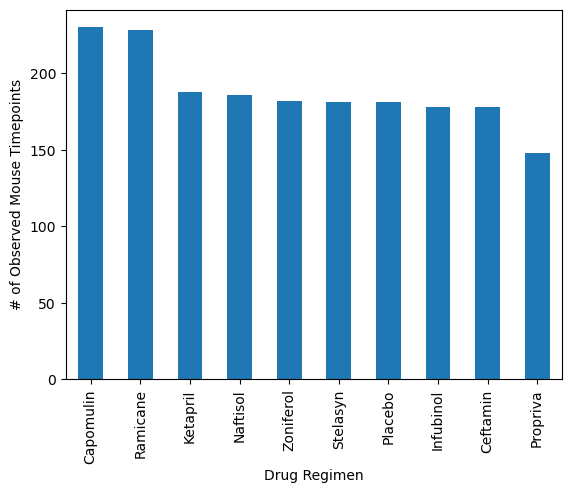

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs = mouse_df_clean['Drug Regimen'].value_counts()
drugs.plot.bar(ylabel = '# of Observed Mouse Timepoints', xlabel = 'Drug Regimen')

Text(0.5, 0, 'Drug Regimen')

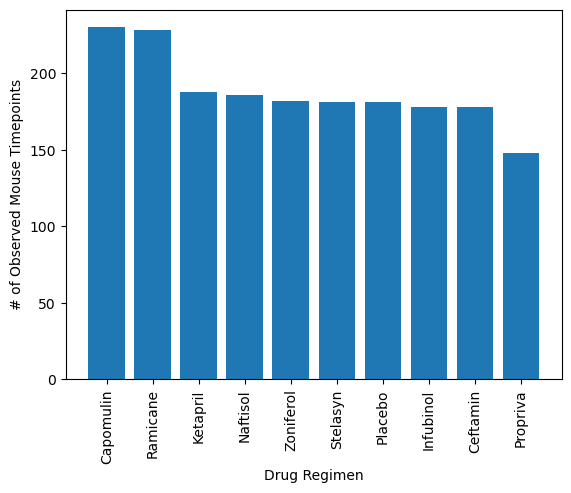

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x = drugs.index, height = drugs)
plt.xticks(rotation = 90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel('Drug Regimen')

<Axes: ylabel='Sex'>

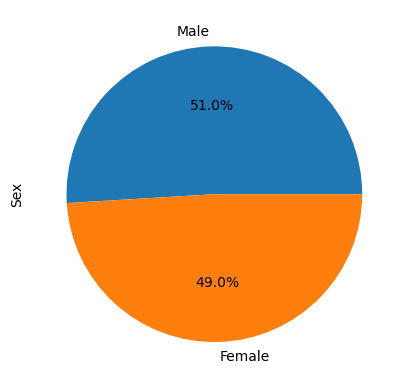

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = mouse_df_clean['Sex'].value_counts()
sex.plot.pie(autopct='%1.1f%%')

Text(-1.5, 0, 'Sex')

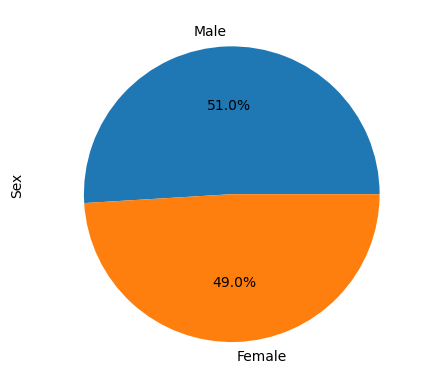

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex.index
plt.pie(sex, labels = labels, autopct='%1.1f%%')
plt.text(x = -1.5, y = 0, s = 'Sex', rotation = 'vertical')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_tp = mouse_df_clean.groupby('Mouse ID')['Timepoint'].max()
last_tp_df = pd.merge(mouse_df_clean, last_tp, how = 'outer', on= "Mouse ID")
last_tp_df = last_tp_df.rename(columns = {'Timepoint_y':'Last_Timepoint'})
last_tp_df

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_tp_df = last_tp_df.loc[last_tp_df['Drug Regimen'].isin(drug_list)]
mice_final = last_tp_df[last_tp_df['Timepoint_x'] == last_tp_df['Last_Timepoint']]

mice_final_stats = mice_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()

for drug in drug_list:
    subset = mice_final.loc[mice_final['Drug Regimen'] == drug]
    iqr = mice_final_stats.loc[drug,'75%'] - mice_final_stats.loc[drug,'25%']
    upper = mice_final_stats.loc[drug,'75%'] + 1.5*iqr
    lower = mice_final_stats.loc[drug,'25%'] - 1.5*iqr
    big = subset.loc[subset['Tumor Volume (mm3)'] > upper,:]
    small = subset.loc[subset['Tumor Volume (mm3)'] < lower,:]
    outliers = pd.concat([big,small])
    print(f"Potential Outliers for {drug}: {outliers['Tumor Volume (mm3)']}")

Potential Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential Outliers for Infubinol: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen', ylabel='Final Tumor Volume (mm3)'>

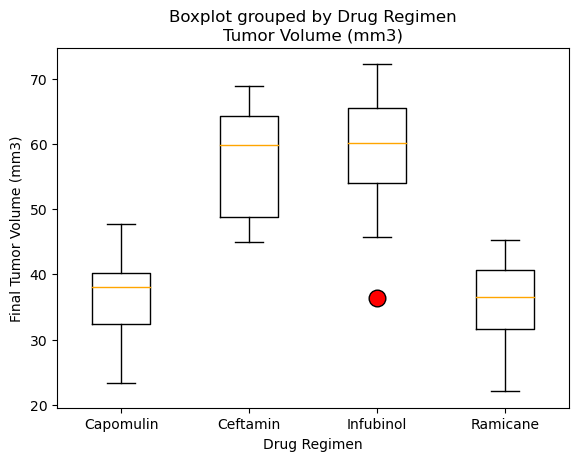

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 12)
medianprops = dict(color = 'orange')
mice_final.boxplot(column = 'Tumor Volume (mm3)', by = 'Drug Regimen', grid = False, ylabel = 'Final Tumor Volume (mm3)', 
                   color = 'black', flierprops = flierprops, medianprops = medianprops)

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse b128'}, xlabel='Timepoint (days)', ylabel='Tumor Volume'>

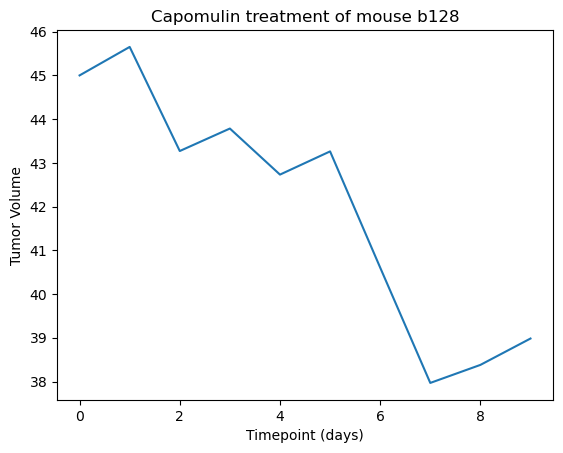

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap = mouse_df_clean[mouse_df_clean['Drug Regimen'] == 'Capomulin']
cap_ID = cap['Mouse ID'][0]
cap_single = cap.loc[cap['Mouse ID'] == cap_ID, 'Tumor Volume (mm3)']
cap_single.plot.line(title = f'Capomulin treatment of mouse {cap_ID}', ylabel = 'Tumor Volume', xlabel = 'Timepoint (days)')

<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

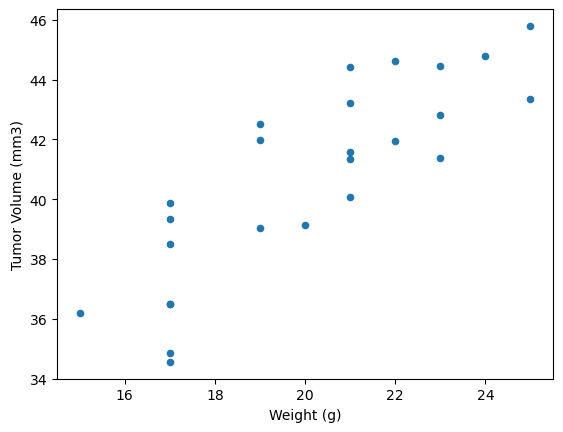

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_total = mouse_df_clean[['Mouse ID','Weight (g)','Tumor Volume (mm3)','Drug Regimen']].loc[mouse_df_clean['Drug Regimen'] == 'Capomulin',:]
cap_total_avg = pd.DataFrame(cap_total.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean())
cap_total_avg = cap_total_avg.reset_index()
cap_total_avg.plot.scatter(y = 'Tumor Volume (mm3)', x = 'Weight (g)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

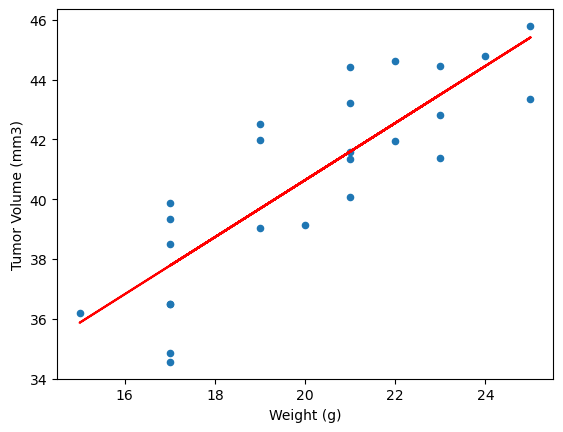

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
lm = st.linregress(x = cap_total_avg['Weight (g)'], y = cap_total_avg['Tumor Volume (mm3)'])
vol_fit = lm[0]*cap_total_avg['Weight (g)'] + lm[1]
cap_total_avg['Fitted'] = vol_fit
ax = cap_total_avg.plot.scatter(y = 'Tumor Volume (mm3)', x = 'Weight (g)')
print(f"The correlation between mouse weight and the average tumor volume is {'%.2f' % lm[2]}")
cap_total_avg.plot.line(x = 'Weight (g)', y = 'Fitted', color = 'red', ax=ax, legend = None)